In [0]:
# 1.1 Facebook Network: Structural properties of the Facebook network
if (!require("igraph")) install.packages("igraph")
library ("igraph")

setwd("/Users/max/Dropbox/UCLA/EC ENGR 232E/Project 2")  # directory of the Facebook network edgelist

Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [1]:
# Question 1
g <- read_graph("facebook_combined.txt", format="edgelist", directed=F)

g.is_connected <- is.connected(g)
print(paste("Is the Facebook network connected? ", g.is_connected, sep=""))
if (!g.is_connected) {
  # Find the giant connected component
  g.components <- clusters(g)
  ix <- which.max(g.components$csize)
  gcc <- induced.subgraph(g, which(g.components$membership == ix))
  print(paste("Size of GCC: ", gsize(gcc), sep=""))
}

ERROR: ignored

In [0]:
# Question 2
print(paste("Diameter of the network: ", diameter(g), sep=""))

[1] "Diameter of the network: 8"


[1] "Average Degree: 43.6910126268878"


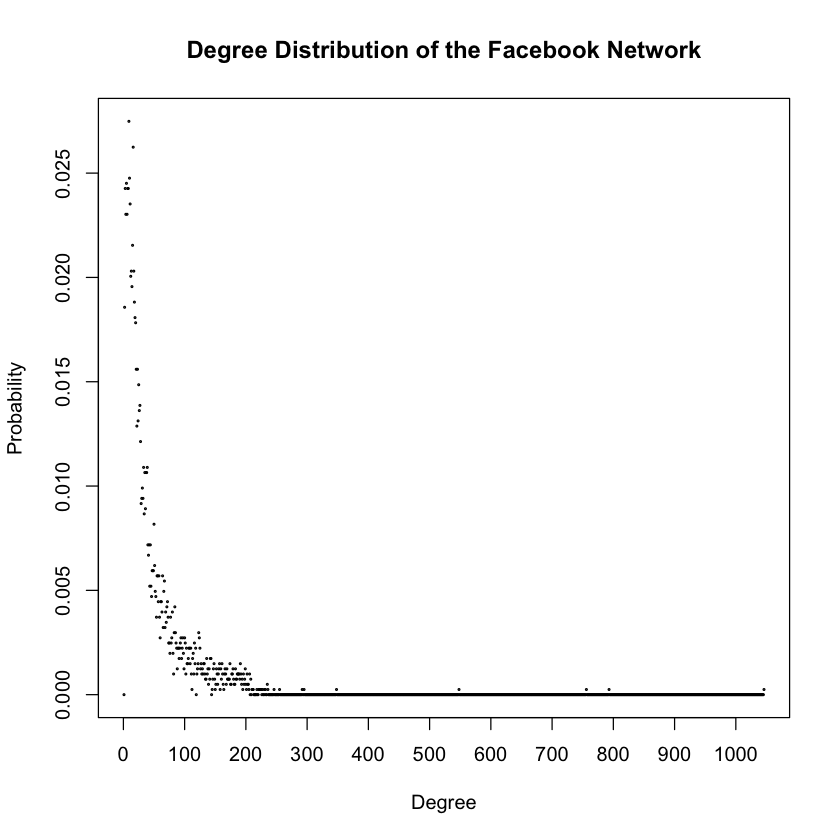

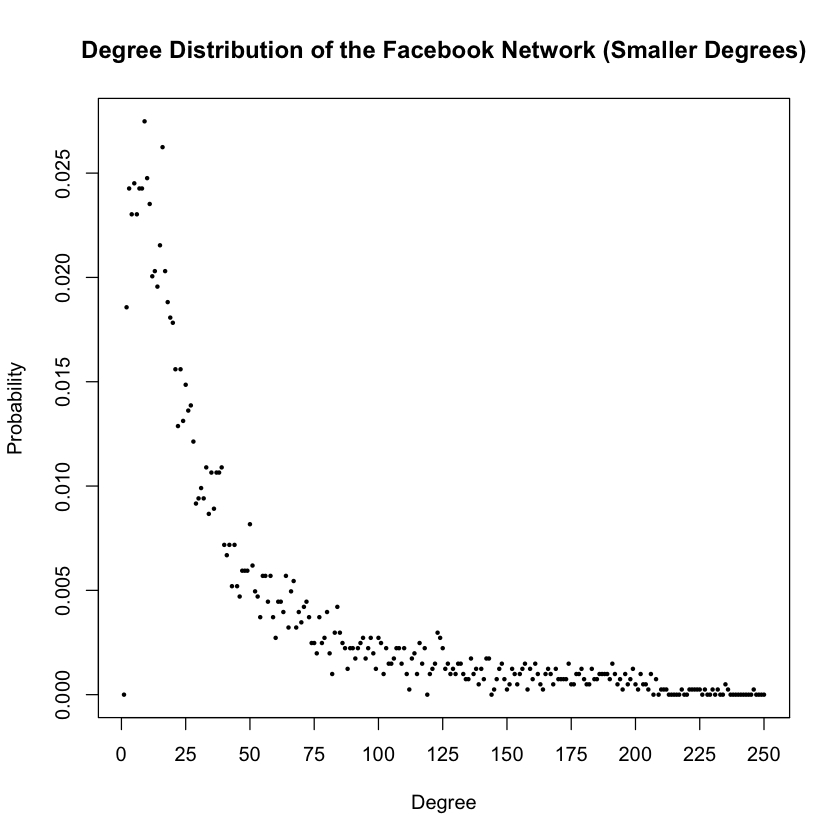

In [0]:
# Question 3
g.degree_dist <- degree.distribution(g)
plot(g.degree_dist, type='p', cex=0.2, xaxt='n',
     main="Degree Distribution of the Facebook Network", xlab="Degree", ylab="Probability")
axis(side=1, at=seq(0, 1000, by=100))
print(paste("Average Degree: ", mean(degree(g)), sep=""))

plot(g.degree_dist[1:250], type='p', cex=0.5, pch=16, col="black", xaxt='n',
     main="Degree Distribution of the Facebook Network (Smaller Degrees)", xlab="Degree", ylab="Probability")
axis(side=1, at=seq(0, 300, by=25))


Call:
lm(formula = degree_dist_log ~ deg_log)

Coefficients:
(Intercept)      deg_log  
    -0.2871      -1.2475  



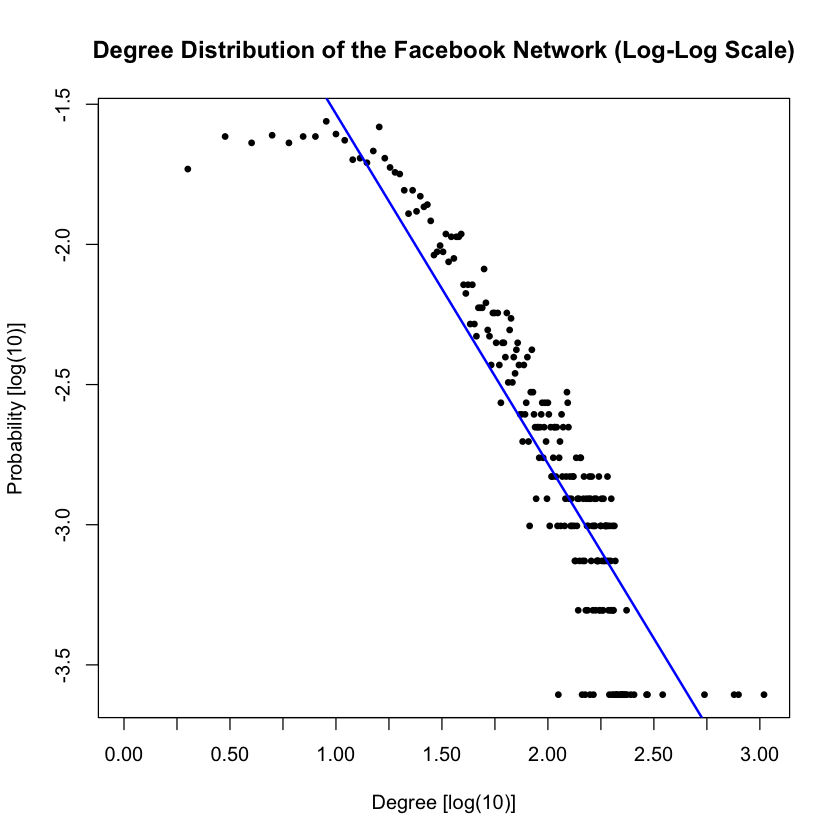

In [0]:
# Question 4
deg_log <- log(1:length(g.degree_dist), base=10)
degree_dist_log <- log(g.degree_dist, base=10)
plot(deg_log, degree_dist_log, type='p', cex=0.75, pch=16, xaxt='n',
     main="Degree Distribution of the Facebook Network (Log-Log Scale)", xlab="Degree [log(10)]", ylab="Probability [log(10)]")
axis(side=1, at=seq(0, 3, by=0.25))

deg_log[which(!is.finite(deg_log))] = NA  # remove all NaN and Inf entries to build linear model
degree_dist_log[which(!is.finite(degree_dist_log))] = NA
deg_dist_lm <- lm(degree_dist_log ~ deg_log)
print(deg_dist_lm)
abline(deg_dist_lm, lwd=2, col="blue")